C:\Users\matte\AppData\Local\Temp\ipykernel_40172\1020228713.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


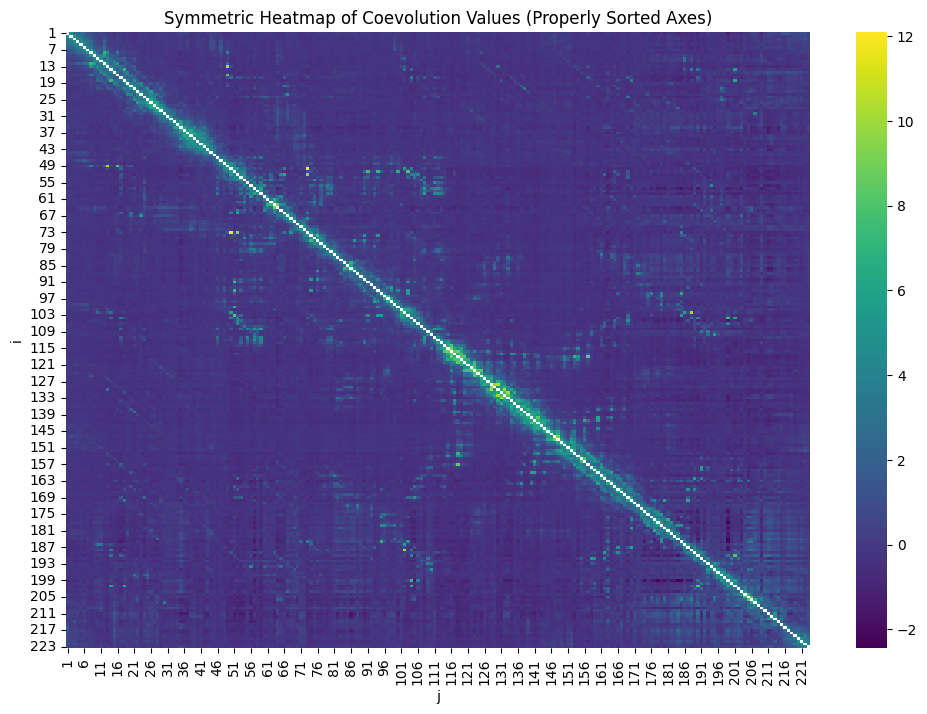

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = 'coevolution (1).csv'
data = pd.read_csv(file_path)

# Remove the 'A' from the values in columns 'i' and 'j'
data['i'] = data['i'].str.replace('A', '')
data['j'] = data['j'].str.replace('A', '')

# Pivot the data to create a matrix suitable for a heatmap
heatmap_data = data.pivot(index="i", columns="j", values="value")

# Mirror the heatmap across the diagonal by combining the original and transposed matrices
symmetric_heatmap_data = heatmap_data.combine_first(heatmap_data.T)

# Convert the indices to integers for proper sorting
symmetric_heatmap_data.index = symmetric_heatmap_data.index.astype(int)
symmetric_heatmap_data.columns = symmetric_heatmap_data.columns.astype(int)

# Sort the indices and columns to ensure both axes go from 1 to the maximum value in ascending order
symmetric_heatmap_data_sorted = symmetric_heatmap_data.sort_index(axis=0).sort_index(axis=1)

# Plot the properly sorted symmetric heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(symmetric_heatmap_data_sorted, cmap="viridis", cbar=True)
plt.title("Symmetric Heatmap of Coevolution Values (Properly Sorted Axes)")
plt.xlabel("j")
plt.ylabel("i")
plt.show()


In [2]:
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px

# Load the CSV files
coevolution_file_path = 'coevolution (1).csv'
interface_summary_file_path = 'interface_summary.csv'

coevolution_data = pd.read_csv(coevolution_file_path)
interface_data = pd.read_csv(interface_summary_file_path)

# Remove the 'A' from the values in columns 'i' and 'j'
coevolution_data['i'] = coevolution_data['i'].str.replace('A', '')
coevolution_data['j'] = coevolution_data['j'].str.replace('A', '')

# Pivot the data to create a matrix suitable for a heatmap
heatmap_data = coevolution_data.pivot(index="i", columns="j", values="value")

# Mirror the heatmap across the diagonal by combining the original and transposed matrices
symmetric_heatmap_data = heatmap_data.combine_first(heatmap_data.T)

# Convert the indices to integers for proper sorting
symmetric_heatmap_data.index = symmetric_heatmap_data.index.astype(int)
symmetric_heatmap_data.columns = symmetric_heatmap_data.columns.astype(int)

# Sort the indices and columns to ensure both axes go from 1 to the maximum value in ascending order
symmetric_heatmap_data_sorted = symmetric_heatmap_data.sort_index(axis=0).sort_index(axis=1)

# Initialize a new DataFrame to track the cluster connections
cluster_connections = pd.DataFrame(0, index=symmetric_heatmap_data_sorted.index, columns=symmetric_heatmap_data_sorted.columns)

# Loop through each cluster and mark the connections in the cluster_connections DataFrame
for cluster_id in interface_data['cluster'].unique():
    cluster_residues = interface_data[interface_data['cluster'] == cluster_id]['res_pos'].values
    for i in cluster_residues:
        for j in cluster_residues:
            if i != j:
                cluster_connections.at[i, j] = 1

# Create the base heatmap (coevolution data)
heatmap = go.Heatmap(
    z=symmetric_heatmap_data_sorted.values,
    x=symmetric_heatmap_data_sorted.columns,
    y=symmetric_heatmap_data_sorted.index,
    colorscale='Viridis',
    colorbar=dict(title='Value'),
    hoverongaps=False,
)

# Create the overlay heatmap (cluster connections)
overlay = go.Heatmap(
    z=cluster_connections.values,
    x=cluster_connections.columns,
    y=cluster_connections.index,
    colorscale=[[0, 'rgba(255,255,255,0)'], [1, 'rgba(255,0,0,0.5)']],  # Light red overlay
    showscale=False,
    hoverinfo='skip',
    visible=False  # Start with the overlay hidden
)

# Create the figure with both heatmaps
fig = go.Figure(data=[heatmap, overlay])

# Modify the layout to set the figure size to 100x100 pixels
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=[{'visible': [True, False]}],
                    label="Show Base Heatmap",
                    method="update"
                ),
                dict(
                    args=[{'visible': [True, True]}],
                    label="Show Heatmap with Overlay",
                    method="update"
                )
            ]),
            direction="down",
            showactive=True,
        )
    ],
    title="Symmetric Heatmap with Toggleable Cluster Connections Overlay",
    xaxis_title="j",
    yaxis_title="i",
    yaxis_autorange='reversed',
    width=1000,  # Set the figure width to 100 pixels
    height=1000  # Set the figure height to 100 pixels
)

# Display the interactive plot
fig.show()
